In [1]:
#since noteboke doesn't work in jupiterlabs    %matplotlib notebook 
%matplotlib inline 
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import os
# os.environ['PATH'] += os.pathsep + 'D:\\6OHDA\\'
import numpy as np
import scipy as sci
from IO import *
from utils import *
import re
import tqdm

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Conv2D, Conv1D,MaxPooling1D
# from tensorflow.keras.layers.core import Lambda
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns

import pickle
import random
# import png

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.config.list_physical_devices()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3774321040501734157
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10091102208
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1548650894829921777
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:17:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 10091102208
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13402876291712152474
physical_device_desc: "device: 1, name: GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1"
]


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [4]:
Files = ['FinalData_6OHDA.h5','FinalData_6OHDA_H.h5']
miceList = getMiceList(Files[0])
#miceList.remove('1253')
#miceList.remove('1231')
def periodCalc(day):
    if day== 0:
        return 'Healthy'
    elif day<13:
        return 'Acute' #day 1-13
    else:
        return 'Chronic' #day 14-35

In [5]:
mTrain = ['0761', '1208', '1222', '1231', '1236', '7909' , '1793','4539',  '8430','1253']
mValidate = ['2976', '2980', '2981', '7584']
mTest = ['8803', '8815']

In [7]:
# create and save the LFP images so can do flow from directory
savePath = "E:\\data\\"
for g in ['Train','Validate','Test']:
    if not os.path.isdir(savePath+g):
            os.mkdir(savePath+g)
    sPath = savePath+g+"\\"
    for cond in ['Healthy','Acute','Chronic']:
        if not os.path.isdir(sPath+cond):
            os.mkdir(sPath+cond)


In [63]:
savePath = "E:\\data\\"
dtL = 0.0032768
tPlot = np.linspace(-2,2,int(4/dtL-1))
f = h5py.File('D:\\6OHDA\\Spectograms.hdf5','r') 
for g in ['Train','Validate','Test']:
    mList = eval("m"+g)
    sPath = savePath+g+"\\"
    for m in mList:
        data =  getData(Files[0],['lfp','speed'],period ='Pre', mice=m)
        for sess in data:
            if sess[5] == 'B':
                day = 0
            else:
                day = int(re.findall(r'\d+',sess[5:])[0])

            # get data
            period = periodCalc(day)
            freq = f[m][sess]['Pre']['freq'][:]
            coeff = np.abs(f[m][sess]['Pre']['coeff'][:])
            lfpOutliers = removeLFPOutliers(data[sess]['lfp']['lfp'], sess)
            coeff[:,(lfpOutliers[:,0]==1)] = np.nan
            coeff = coeff.T
            a = sci.signal.decimate(coeff,10,axis=0)
            del coeff
            A = [a[i : i + tPlot.shape[0],:] for i in range(0, a.shape[0],int(np.ceil(1/dtL)))] 
            if g == 'Test':
                sPathSess = sPath + 'unlabeled\\'
            else:
                sPathSess = sPath +period+'\\'
            for ind,img in enumerate(A):
                z = (65535*((img - img.min())/img.ptp())).astype(np.uint16)
                with open(sPathSess+'{m:s}_{ind:d}.png'.format(m=sess,ind=ind), 'wb') as f2:
                    writer = png.Writer(width=z.shape[1], height=z.shape[0], bitdepth=16, greyscale=True)
                    zgray2list = z.tolist()
                    writer.write(f2, zgray2list)
                

                

                


cleaning up lfp data
cleaning up speed data
cleaning up lfp data
I deleted session: 1208_day12
cleaning up speed data
found  17.0  outlier points
cleaning up lfp data
cleaning up speed data
cleaning up lfp data
cleaning up speed data
cleaning up lfp data
cleaning up speed data
found  1.0  outlier points
found  888231.0  outlier points
found  481139.0  outlier points
cleaning up lfp data
cleaning up speed data
cleaning up lfp data
cleaning up speed data
cleaning up lfp data
cleaning up speed data
found  29.0  outlier points
cleaning up lfp data
cleaning up speed data
cleaning up lfp data
cleaning up speed data
cleaning up lfp data
I deleted session: 2976_day4
cleaning up speed data
found  1.0  outlier points
found  3.0  outlier points
cleaning up lfp data
cleaning up speed data
cleaning up lfp data
cleaning up speed data
found  50.0  outlier points
cleaning up lfp data
cleaning up speed data
cleaning up lfp data
cleaning up speed data
cleaning up lfp data
cleaning up speed data


In [55]:
# f = h5py.File('D:\\6OHDA\\Spectograms.hdf5','r') 
# fig, ax = plt.subplots(1,2)
# # m = '1208'
# sess = '1208_BaselineA'
# data =  getData(Files[0],['lfp','speed'],period ='Pre', mice=m)
# freq = f[m][sess]['Pre']['freq'][:]
# coeff = np.abs(f[m][sess]['Pre']['coeff'][:])
# lfpOutliers = removeLFPOutliers(data[sess]['lfp']['lfp'], sess)
# coeff[:,(lfpOutliers[:,0]==1)] = np.nan
# coeff = coeff.T

# ax[0].pcolormesh(np.arange(3000),freq,coeff[3000:6000,:].T)
# a = sci.signal.decimate(coeff,10,axis=0)
# ax[1].pcolormesh(np.arange(300),freq,a[300:600,:].T)
# dtL = 0.0032768
# tPlot = np.linspace(-2,2,int(4/dtL-1))
# f.close()
# from PIL import Image
sPath = savePath+g+"\\"
for ind,img in enumerate(A):
    z = (65535*((img - img.min())/img.ptp())).astype(np.uint16)
    print(sPath+'{m:s}_{ind:d}.png'.format(m=m,ind=ind))
    if ind>2:
        break

E:\data\Test\1208_0.png
E:\data\Test\1208_1.png
E:\data\Test\1208_2.png
E:\data\Test\1208_3.png


In [54]:


# fig, ax = plt.subplots(1,1)
# ax.pcolormesh(np.arange(A[0].shape[0]),np.arange(A[0].shape[1]),A[0].T,
#                                 rasterized = True)
# ax.set_aspect('equal', adjustable='box')
# ind=0

with open('E:\\{m:s}_{ind:d}.png'.format(m=m,ind=ind), 'wb') as f:
    writer = png.Writer(width=z.shape[1], height=z.shape[0], bitdepth=16, greyscale=True)
    zgray2list = z.tolist()
    writer.write(f, zgray2list)
# from PIL import Image
# image =  np.array(Image.open('E:\\{m:s}_{ind:d}.png'.format(m=m,ind=ind)))

print(image.shape,z.shape)
np.sum(image!=z)

(1219, 87) (1219, 87)


0

In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
    directory="E:\\data\\Train\\",
    target_size=(1219, 87),
    color_mode="grayscale",
    batch_size=32,
    class_mode="sparse",
    shuffle=True,
    seed=36
)
validate_generator = valid_datagen.flow_from_directory(
    directory="E:\\data\\Validate\\",
    target_size=(1219, 87),
    color_mode="grayscale",
    batch_size=32,
    class_mode="sparse",
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory="E:\\data\\Test\\",
    target_size=(1219, 87),
    color_mode="grayscale",
    batch_size=32,
    class_mode="sparse",
    shuffle=False
)

Found 59704 images belonging to 3 classes.
Found 28569 images belonging to 3 classes.
Found 16495 images belonging to 1 classes.


In [75]:
# calculate the class weight: - flow from directory goes alphabetically so Acute, Chroniq, Healthy
files_per_class = []
for folder in ['Acute','Chronic','Healthy']:
    if not os.path.isfile("E:\\data\\Train\\"+folder):
            files_per_class.append(len(os.listdir("E:\\data\\Train\\"+folder)))
total_files = sum(files_per_class)
class_weights = {}
for i in range(len(files_per_class)):
    class_weights[i] = 1 - (float(files_per_class[i]) / total_files)
print (class_weights)

{0: 0.656639421144312, 1: 0.6418330430121935, 2: 0.7015275358434946}


In [106]:
print(files_per_class)

[20500, 21384, 17820]


In [37]:
del model

In [38]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
model = Sequential()
model.add(Conv2D(16, kernel_size=10, activation='tanh', input_shape=(1219,87,1),kernel_initializer=initializer))
model.add(Conv2D(32, kernel_size=5, activation='tanh',kernel_initializer=initializer))
model.add(Conv2D(64, kernel_size=3, activation='tanh',kernel_initializer=initializer))
model.add(Flatten())
model.add(Dense(50, activation='tanh',kernel_initializer=initializer))
model.add(Dense(3, activation='softmax'))

In [39]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 1210, 78, 16)      1616      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1206, 74, 32)      12832     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1204, 72, 64)      18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5548032)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                277401650 
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
Total params: 277,434,747
Trainable params: 277,434,747
Non-trainable params: 0
________________________________________

In [40]:
# debugging
debug_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
debug_datagen = debug_datagen.flow_from_directory(
    directory="E:\\data\\debug\\",
    target_size=(1219, 87),
    color_mode="grayscale",
    batch_size=3,
    class_mode="sparse",
    shuffle=True,
    seed=36
)

        

Found 153 images belonging to 3 classes.


In [44]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=validate_generator.n//validate_generator.batch_size

# history = model.fit(train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=validate_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     epochs=2) #class_weight=class_weights,
history = model.fit(debug_datagen,
                    epochs=20) #class_weight=class_weights,


# print(dataP.shape)
# model.fit(loadData(data))


Epoch 1/20
51/51 [==============================] - 6s 117ms/step - loss: 1.1125 - accuracy: 0.3137
Epoch 2/20
51/51 [==============================] - 6s 116ms/step - loss: 1.1167 - accuracy: 0.3268
Epoch 3/20
51/51 [==============================] - 6s 116ms/step - loss: 1.1109 - accuracy: 0.3464
Epoch 4/20
51/51 [==============================] - 6s 116ms/step - loss: 1.1216 - accuracy: 0.3203
Epoch 5/20
51/51 [==============================] - 6s 116ms/step - loss: 1.1135 - accuracy: 0.2680
Epoch 6/20
51/51 [==============================] - 6s 116ms/step - loss: 1.1236 - accuracy: 0.3007
Epoch 7/20
51/51 [==============================] - 6s 116ms/step - loss: 1.1242 - accuracy: 0.2418
Epoch 8/20
51/51 [==============================] - 6s 116ms/step - loss: 1.1221 - accuracy: 0.2680
Epoch 9/20
51/51 [==============================] - 6s 116ms/step - loss: 1.1147 - accuracy: 0.2680
Epoch 10/20
51/51 [==============================] - 6s 117ms/step - loss: 1.1187 - accuracy: 0.2418

In [284]:
## Saving the model
# model.save('E:\\caLFP_v1')
# model.save_weights("E:\\caOnly_v1_weights.h5")

INFO:tensorflow:Assets written to: E:\caOnly_v1\assets


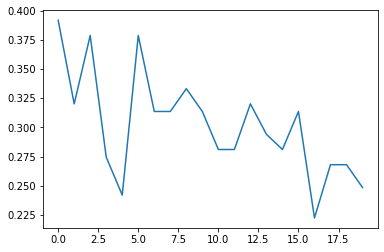

In [43]:
plt.plot(history.history['accuracy'])
# history.history

In [65]:
# x,y = loadTest(data)
score = model.evaluate(test_generator) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])


516/516 [==============================] - 45s 88ms/step - loss: 0.9424 - accuracy: 1.00000s - loss: 0.9424 - accuracy: 1.
Test loss: 0.9424198865890503
Test accuracy: 1.0


In [34]:
# model =  tf.keras.models.load_model('E:\\caOnly_v1')
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# model.load_weights("E:\\caOnly_v1_weights.h5")


pred = model.predict_generator(test_generator,verbose=1)
pred = np.argmax(pred,axis=1)
print(np.unique(pred))

y = []
for f in test_generator.filenames:
    sess = f.split("_")[1]
    if sess[0] == 'B':
        day = 0
    else:
        day = int(re.findall(r'\d+',sess)[0])

    # get data
    period = periodCalc(day) 
    y.append(labels[period])

516/516 [==============================] - 53s 103ms/step
[0 1 2]


In [35]:
np.sum(pred==2)
labels = (train_generator.class_indices)
# print(labels)

In [36]:
# test_generator.filenames
# labels = (train_generator.class_indices)
print(labels)
for f in test_generator.filenames[1775:1785]:
    sess = f.split("_")[1]
    if sess[0] == 'B':
        day = 0
    else:
        day = int(re.findall(r'\d+',sess)[0])

    # get data
    period = periodCalc(day) 
    y = labels[period]
    print(f,y)

{'Acute': 0, 'Chronic': 1, 'Healthy': 2}
unlabeled\8803_BaselineS_93.png 2
unlabeled\8803_BaselineS_94.png 2
unlabeled\8803_BaselineS_95.png 2
unlabeled\8803_BaselineS_96.png 2
unlabeled\8803_BaselineS_97.png 2
unlabeled\8803_BaselineS_98.png 2
unlabeled\8803_BaselineS_99.png 2
unlabeled\8803_day10_0.png 0
unlabeled\8803_day10_1.png 0
unlabeled\8803_day10_10.png 0


2459


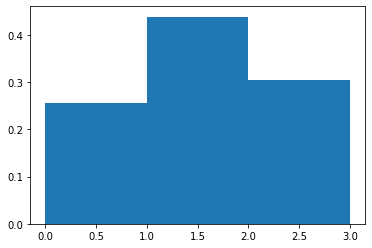

In [131]:
y = []
for ind,(label,dataP) in enumerate(loadTest(dataValidate)):
    y.append(dataP[0])
plt.hist(y,bins=[0,1,2,3],density=True)
print(ind)

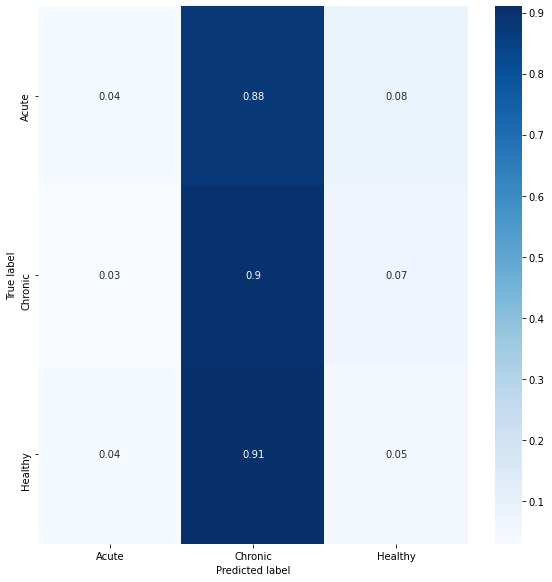

In [36]:
classes=labels.keys()
con_mat = tf.math.confusion_matrix(labels=y, predictions=pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

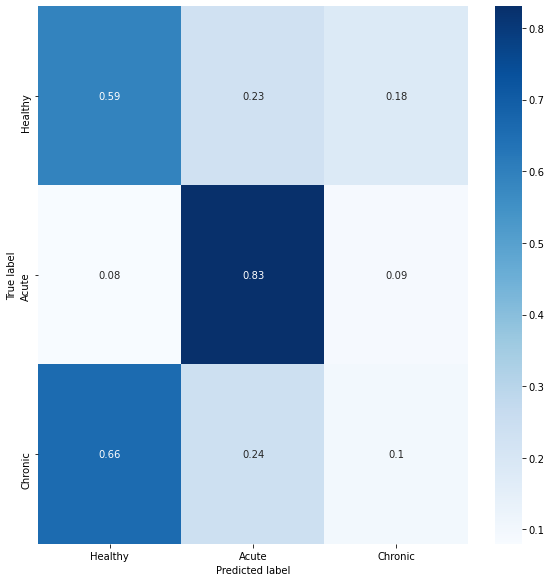

In [290]:
classes=['Healthy','Acute','Chronic']
con_mat = tf.math.confusion_matrix(labels=y, predictions=pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [249]:
# pred = model.predict(loadTest(dataTrain)) 
# print(pred,(sci.special.softmax(pred,axis=1)) )
l

['1793_day8',
 '1222_day7',
 '4539_day15A',
 '1222_BaselineL',
 '1793_BaselineS',
 '7909_day8',
 '1208_day2',
 '8430_day35L',
 '0761_day19L',
 '7909_day10',
 '1236_day30A',
 '1208_BaselineS',
 '1236_day3',
 '1236_day1',
 '4539_day8',
 '1793_day6',
 '1231_BaselineL',
 '0761_day2',
 '8430_day3',
 '1208_BaselineL',
 '0761_day12',
 '4539_day6',
 '7909_day12',
 '1222_day15A',
 '1222_day9',
 '7909_day14',
 '1793_BaselineA',
 '1208_day14',
 '4539_day0',
 '1793_day15A',
 '7909_Baseline2A',
 '0761_BaselineS',
 '0761_day6',
 '1222_day5',
 '1793_day34L',
 '1222_day20L',
 '1208_day30A',
 '0761_day4',
 '1222_day3',
 '0761_day1',
 '1222_day32A',
 '1253_BaselineS',
 '1793_day12',
 '8430_day9',
 '4539_day14',
 '7909_day13',
 '1231_BaselineA',
 '1222_day2',
 '1793_day2',
 '0761_day31A',
 '4539_day12',
 '1793_day14',
 '8430_day19L',
 '7909_day0',
 '8430_day11',
 '1236_day35L',
 '1236_day9',
 '1208_day15A',
 '8430_BaselineS',
 '8430_BaselineL',
 '0761_day8',
 '1208_day12',
 '1236_day13',
 '8430_day5',
 '